In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

In [2]:
data_path = '../data/CALC_STRAIGHT/'
files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

In [3]:
print('STRAIGHT SEGMENTS:\t'+ str(len(files)))

STRAIGHT SEGMENTS:	179


In [4]:
X = pd.read_excel('../data/PN chuze.xlsx',usecols=[0,1])
X.rename(columns={'Unnamed: 0':'FileBVH'},inplace=True)
for s in X.FileBVH: X.loc[X.FileBVH==s,'Subject'] = s[:-4]
X

,FileBVH,Ts [s],Subject
0,N-01-1-Char00.bvh,0.008,N-01-1-Char00
1,A-03-1-Char00.bvh,0.008,A-03-1-Char00
2,N-04-1-Char00.bvh,0.008,N-04-1-Char00
3,N-06-1-Char00.bvh,0.008,N-06-1-Char00
4,N-07-1-Char00.bvh,0.008,N-07-1-Char00
5,A-09-1-Char00.bvh,0.017,A-09-1-Char00
6,N-740516-Char00.bvh,0.017,N-740516-Char00
7,N-535525-Char00.bvh,0.017,N-535525-Char00
8,A-736123-Char00.bvh,0.017,A-736123-Char00
9,A-715211-Char00.bvh,0.017,A-715211-Char00


N-04-1-Char00part7seg-3.csv


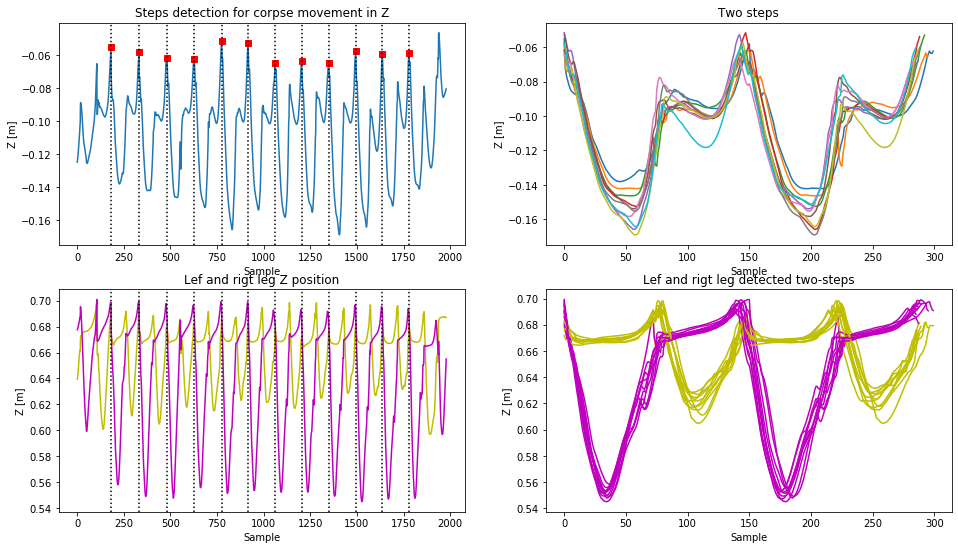

In [5]:
for file in files:
    subject =  file.split(sep='Char00',maxsplit=1)[0]+'Char00'
    print(file)
    
    df = pd.read_csv(data_path + file)
    N = np.size(df,axis=0)
    # Check for the T_sampling from bvh file
    T_sampling = X.loc[X['Subject'] == subject,'Ts [s]'].values
    # Create time vector for this part
    time = np.linspace(0,N,num=N)*T_sampling
    
    # CORPUS
    col_list = df.columns.to_list()
    position_cols = [s for s in col_list if "X" in s]
    xdf = df.filter(position_cols,axis=1)
    corpus_cols = xdf.columns[18:36]
    corpus = xdf.filter(corpus_cols,axis=1)
    zdim_cols = [s for s in corpus_cols if "z" in s]
    x = np.zeros([N,1])
    x = corpus.filter(zdim_cols,axis=1).mean(axis=1).to_numpy()
    
    # LEGS
    leftleg_cols = xdf.columns[6:9]
    rightleg_cols = xdf.columns[15:18]
    leg_L = xdf.filter(leftleg_cols,axis=1)
    leg_R = xdf.filter(rightleg_cols,axis=1)

    x = corpus.filter(zdim_cols,axis=1).mean(axis=1).to_numpy()
    
    # Distance threshold for findpeaks = 1 second
    TH_dist = 1 / T_sampling
    

    peaks, _ = find_peaks(x,distance=TH_dist)
    
    if len(peaks) > 4:
        peaks = peaks[1:-1]
        
    fig, ax = plt.subplots(2, 2, figsize=(16,9))
    ax[0,0].plot(x)
    ax[0,0].plot(peaks, x[peaks], "rs")
    ax[0,0].set_xlabel('Sample')
    ax[0,0].set_ylabel('Z [m]')
    ax[0,0].set_title('Steps detection for corpse movement in Z')        
    
    
    
    #if len(peaks) % 2 == 0:
    #    peaks = peaks[1:]
    for n in range(0,len(peaks)-2):
        tmp_x = x[peaks[n]:peaks[n+2]]
        tmp_LL = leg_L.iloc[peaks[n]:peaks[n+2],2].to_numpy()
        tmp_RL = leg_R.iloc[peaks[n]:peaks[n+2],2].to_numpy()
        ax[0,1].plot(tmp_x)
        ax[1,1].plot(tmp_LL,'y')
        ax[1,1].plot(tmp_RL,'m')
        
        
    ax[0,1].set_xlabel('Sample')
    ax[0,1].set_title('Two steps')
    ax[0,1].set_ylabel('Z [m]')
    
    ax[1,0].plot(leg_L.iloc[:,2],'y')
    ax[1,0].plot(leg_R.iloc[:,2],'m')
    
    for xc in peaks:
        ax[0,0].axvline(x=xc, color='k', linestyle=':')
        ax[1,0].axvline(x=xc, color='k', linestyle=':')
    
    ax[1,0].set_xlabel('Sample')
    ax[1,0].set_title('Lef and rigt leg Z position')
    ax[1,0].set_ylabel('Z [m]')

    ax[1,1].set_xlabel('Sample')
    ax[1,1].set_title('Lef and rigt leg detected two-steps')
    ax[1,1].set_ylabel('Z [m]')

    
    break


In [6]:
peaks

array([ 181,  331,  481,  627,  774,  916, 1062, 1203, 1348, 1493, 1636,
       1779])

In [7]:
df.head()

,OrigIndex,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,...,59-Q-s,59-Q-x,59-Q-y,59-Q-z,59-A-x,59-A-y,59-A-z,59-W-x,59-W-y,59-W-z
0,57763,3.7856,-10.7415,0.0009,0.0126,-0.3945,0.1380,0.5265,0.4405,0.5734,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57764,3.7869,-10.7447,0.0018,0.0413,-0.4134,0.1455,0.5265,0.4405,0.5734,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57765,3.7884,-10.7482,0.0028,0.0677,-0.4384,0.1519,0.5265,0.4405,0.5734,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57766,3.7903,-10.7520,0.0038,0.0996,-0.4736,0.1528,0.5283,0.4395,0.5743,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,57767,3.7922,-10.7560,0.0050,0.1214,-0.5051,0.1546,0.5301,0.4385,0.5753,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
StepIndex = df.OrigIndex[peaks]
StepIndex

181     57944
331     58094
481     58244
627     58390
774     58537
916     58679
1062    58825
1203    58966
1348    59111
1493    59256
1636    59399
1779    59542
Name: OrigIndex, dtype: int64